## Visualize some of the surfaces from neurosynth

In [2]:
import nibabel as nib
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
import numpy as np
import sys, os

In [25]:
## Load in the human left and right surfaces 
human_lh = '../../../Atlas/surfaces/human/32k_fs_LR/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii'
human_rh = '../../../Atlas/surfaces/human/32k_fs_LR/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii'
surf_lh = read_surface(human_lh)
surf_rh = read_surface(human_rh)

In [29]:
## mapping one of the activationMap to the surface
lh = '../Figure6Data/NeurosynthSurfaces/topicSurfaces/pain/activationMap.lh.func.gii'
rh = '../Figure6Data/NeurosynthSurfaces/topicSurfaces/pain/activationMap.rh.func.gii'
lh = nib.load(lh).agg_data()
rh = nib.load(rh).agg_data()
data = np.vstack((lh, rh))
data = np.reshape(data, (-1))
thresh = np.percentile(data, 90)
data = np.where(data <= thresh, np.nan, data)
data.shape

(64984,)

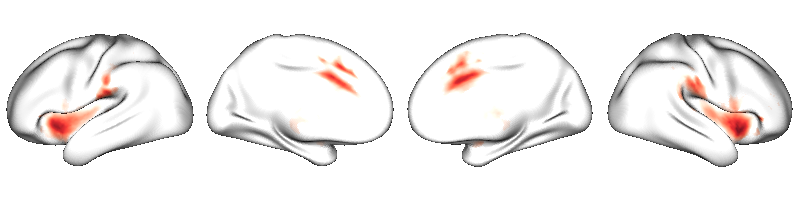

In [30]:
plot_hemispheres(surf_lh, surf_rh, array_name=data, size=(800, 200), embed_nb=True, cmap="Reds", zoom=1.2, nan_color=(1, 1, 1, 1))

In [41]:
path = '../Figure6Data/NeurosynthSurfaces'
directories = [os.path.join(path, d) for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
def saveImages(directories):
    for path in directories:
        lh = nib.load(os.path.join(path, 'averageVolume.lh.func.gii')).agg_data()
        rh = nib.load(os.path.join(path, 'averageVolume.rh.func.gii')).agg_data()
        data = np.vstack((lh, rh))
        data = np.reshape(data, (-1))
        thresh = np.percentile(data, 90)
        data = np.where(data <= thresh, np.nan, data)
        plot_hemispheres(surf_lh, surf_rh, array_name=data, size=(800, 200), embed_nb=True, cmap="Reds", zoom=1.2, nan_color=(1, 1, 1, 1), screenshot=True, filename=os.path.join(path, "activationMap.png"))

saveImages(directories)

Context leak detected, msgtracer returned -1


In [37]:
directories

['../Figure6Data/NeurosynthSurfaces/topicSurfaces/reading',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/working_memory',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/attention',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/cognitive_control',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/numerical',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/eye_movements',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/multisensory',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/social_cognition',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/language',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/recognition_memory',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/affective',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/semantics',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/visual_attention',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/inhibition',
 '../Figure6Data/NeurosynthSurfaces/topicSurfaces/motor',
 '../Figure6Data/NeurosynthSurfac